
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Os dados são criados a seguir:

In [3]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


O teste é unilateral á direita. Isso porque a hipótese alternativa é que a média da notas da Estratégia B é maior que a média das notas da Estratégias A. Em outras palavras, estamos testando se a Estratégia B é superior á Estratégia A, e não apenas se há uma diferença (que seria um teste bicaudal).

In [11]:
# Calculando as médias
media_A = np.mean(amostra_estrategia_A)
media_B = np.mean(amostra_estrategia_B)

# Calculando as variâncias
var_A = np.var(amostra_estrategia_A, ddof=1)
var_B = np.var(amostra_estrategia_B, ddof=1)

print(f"Média da Estratégia A: {media_A:.2f}")
print(f"Média da Estratégia B: {media_B:.2f}")
print(f"Variância da Estratégia A: {var_A:.2f}")
print(f"Variância da Estratégia B: {var_B:.2f}")

Média da Estratégia A: 71.41
Média da Estratégia B: 74.75
Variância da Estratégia A: 129.27
Variância da Estratégia B: 110.47


In [24]:
# Calculo do teste Z
n_A = len(amostra_estrategia_A)
n_B = len(amostra_estrategia_B)
z = (media_B - media_A) / np.sqrt((var_A / n_A) + (var_B / n_B))

# Cálculo do p-valor (teste unilateral á direita)
p_valor = 1 - stats.norm.cdf(z)

# Nível de significância 
alpha = 0.05

# Resultado
print(f"Estatística Z: {z:.4f}")
print(f"P-valor: {p_valor:.4f}")

if p_valor < alpha:
    print("Rejeitamos a hipótese nula (H0). Há uma diferença significativa.")
else:
    print("Não rejeitamos a hipótese nula (H0). Não há diferença significativa.")

Estatística Z: 1.5267
P-valor: 0.0634
Não rejeitamos a hipótese nula (H0). Não há diferença significativa.


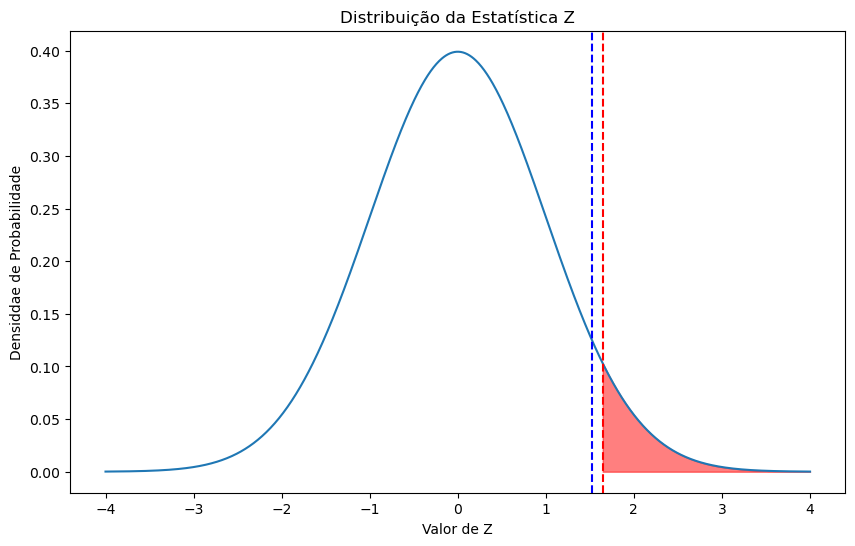

In [26]:
# Criando o gráfico de distribuição
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 6))
plt.plot (x, y, label="Distribuição Normal Padrão (Z)")
plt.axvline(x_critico, color="red", linestyle="--", label=f"Z crítico = {x_critico:.2f}")

# Destacando a região crítica (unilateral á direita)
x_critico = stats.norm.ppf(1 - alpha)
plt.fill_between(x, y, where=(x >= x_critico), color='red', alpha=0.5, label="Região Crítica")

# Marcando o valor de Z calculado
plt.axvline(z, color="blue", linestyle="--", label=f"Z calculando = {z:.2f}")

# Legenda e Título
plt.title("Distribuição da Estatística Z")
plt.xlabel("Valor de Z")
plt.ylabel("Densidade de Probabilidade")github

plt.show()

O que podemos observar no gráfico:

1. O teste é unilateral á direita porque estamos testando se a média da Estratégia A.

2.  A área em vermelho é a região crítica, onde rejeitamos H0 se o valor de Z cair nessa área.

3.  A linha tracejada azul representa o valor de Z calculado.

4.  Se o valor de Z cair na região crítica (área vermelha), rejeitamos H). Caso contrério, não rejeitamos 